# 1. 데이터 기본확인 및 결측치 처리

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")

print(df.info())
print(df.describe())
print(df.isnull().sum())

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB
None
         supply(kg)   price(원/kg)
count  5.939700e+04  59397.000000
mean   1.189453e+04   1131.680674
std    5.226400e+04   2029.941445
min    0.000000e+00      0.000000
25%    0.000000e+00      0.000000
50%    0.000000e+00      0.000000
75%    3.800000e+03   1519.000000
max    1.222800e+06  20909.000000
ID             0
timestamp      0
item           0
corporation    0
location       0
supply(kg)     0
price(원/kg)    0
dtype: int64


#2. EDA 기본 요약

In [ ]:
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 폰트 절대 경로
fontprop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

print("현재 폰트:", fontprop.get_name())


현재 폰트: NanumGothic


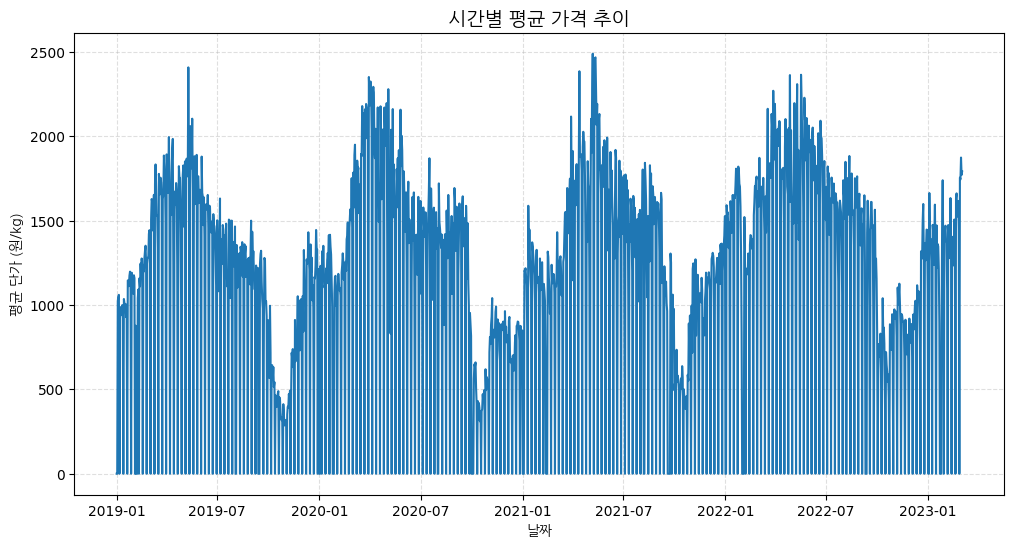

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
price_trend = df.groupby('timestamp')['price(원/kg)'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=price_trend, x='timestamp', y='price(원/kg)')
plt.title("시간별 평균 가격 추이", fontproperties=fontprop, fontsize=14)
plt.xlabel("날짜", fontproperties=fontprop)
plt.ylabel("평균 단가 (원/kg)", fontproperties=fontprop)
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


그래프를 보면 2019년부터 2023년까지 평균 단가가 뚜렷한 주기성을 보이며 반복적으로 상승과 하락을 거듭하고 있다. 매년 초나 여름철에 단가가 높아지고, 연말이나 겨울철에 하락하는 경향이 나타나는 것으로 보아 계절적 요인과 공급량 변화가 가격에 직접적인 영향을 미치는 것으로 해석된다.

이는 생산·유통 시기의 불균형이나 특정 계절의 수요 집중이 단가 변동의 주요 요인으로 작용하고 있음을 의미한다.

또한 전체적인 흐름을 보면, 연도별 평균 단가가 완만하게 상승하는 추세를 보이고 있다. 이는 물류비, 인건비 등의 상승과 같은 외부 요인이 누적되며 시장 전반의 단가가 점진적으로 높아지고 있음을 시사한다.

전반적으로 해당 품목은 계절성과 수급 변동에 따라 단기 변동성이 크며, 장기적으로는 완만한 상승세를 유지하고 있는 시장 구조로 해석된다.

/tmp/ipython-input-855247985.py:20: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-855247985.py:20: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


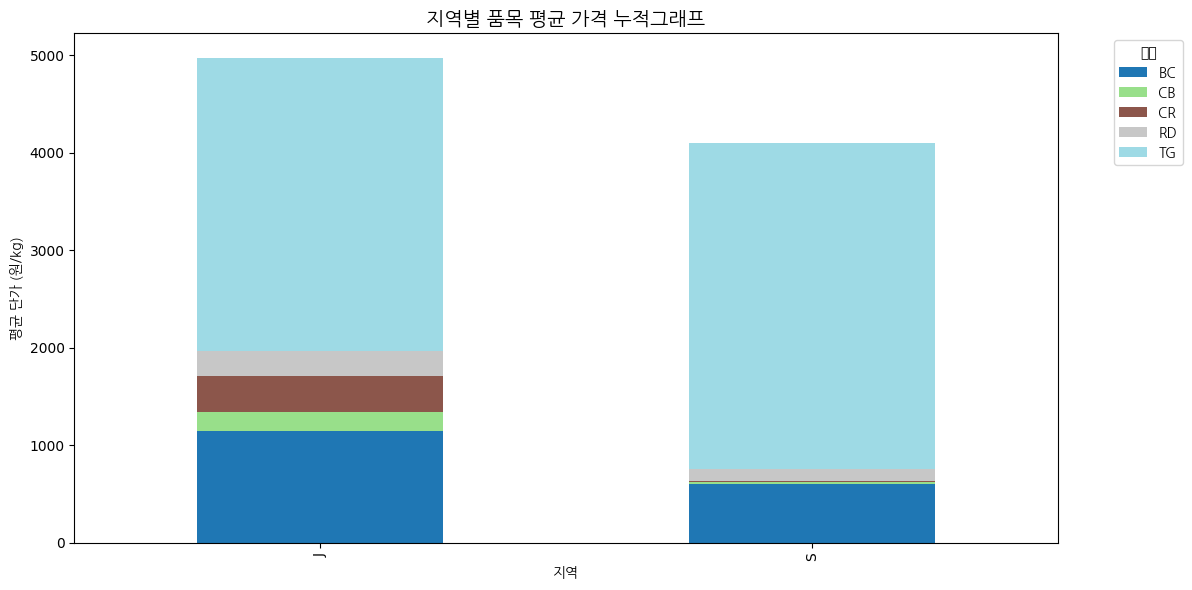

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 3. 누적 막대그래프 코드
stack_df = df.groupby(['location', 'item'])['price(원/kg)'].mean().reset_index()
pivot_df = stack_df.pivot(index='location', columns='item', values='price(원/kg)').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')

plt.title("지역별 품목 평균 가격 누적그래프", fontproperties=fontprop, fontsize=14)
plt.xlabel("지역", fontproperties=fontprop)
plt.ylabel("평균 단가 (원/kg)", fontproperties=fontprop)
plt.legend(title='품목', prop=fontprop, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



해당 그래프는 지역별로 품목 단가의 누적 구조가 뚜렷하게 구분되어 있다.
J 지역은 전체 평균 단가가 약 5,000원/kg 수준으로 S 지역(약 4,000원/kg)보다 높으며, 품목 구성에서도 다양한 항목이 일정 비율로 분포하고 있다. 특히 TG 품목이 가장 큰 비중을 차지하며, 나머지 BC·CR·RD 품목도 고르게 포함되어 있어 품목 간 단가 편차가 작고 시장이 다변화되어 있는 것으로 해석된다.

반면 S 지역은 전체 단가 수준이 낮고, TG 품목에 대한 의존도가 매우 높은 단일 구조를 보인다. 이는 특정 품목 중심의 가격 형성 구조로, 시장 변동에 따른 단기 리스크가 높을 가능성을 시사한다. 따라서 지역별 단가 차이는 단순한 가격 수준의 문제를 넘어, 품목 구성의 다양성·의존도·시장 안정성 측면에서 차별화된 특징을 보여주는 결과로 해석된다.

#3. 군집화 파생변수 (Gaussian Mixture)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")

numeric_cols = df.select_dtypes(include=np.number).columns
X_scaled = StandardScaler().fit_transform(df[numeric_cols])

gmm = GaussianMixture(n_components=3, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(X_scaled)

print(df[['Cluster_GMM']].head())

   Cluster_GMM
0            2
1            2
2            0
3            0
4            0


이 코드는 Gaussian Mixture Model(GMM) 을 활용하여 데이터셋을 3개의 군집으로 분류한 과정이다.

GMM은 K-Means보다 한 단계 발전된 확률 기반 클러스터링 기법으로, 각 데이터가 여러 군집에 속할 확률을 계산하여 보다 유연한 군집화를 수행한다. 특히 데이터가 타원형 분포를 가지거나 경계가 모호할 때 적합한 알고리즘이다.

코드에서는 StandardScaler를 통해 수치형 변수의 스케일 차이를 보정한 후, fit_predict()를 사용하여 각 행이 속하는 군집 번호를 Cluster_GMM 컬럼으로 저장하였다. 이 과정을 통해 데이터의 내재된 구조적 패턴을 사전에 탐색할 수 있는 기반을 마련한 것이다.

이 결과는 모델링 과정에서 중요한 파생변수로 활용될 수 있는 결과이다. 생성된 Cluster_GMM은 데이터 내 집단 특성을 반영하므로, 이를 예측모델에 추가하면 군집 간 차이를 고려한 정교한 학습이 가능해진다. 또한 각 군집이 price(원/kg)이나 supply(kg)와 어떤 관계를 가지는지를 분석하면, 시장 세분화나 공급 전략 수립 등 의사결정 측면에서도 유의미한 인사이트를 제공할 수 있다.

 즉, 본 코드는 단순한 군집화가 아니라, 데이터의 잠재 구조를 파악하여 예측 모델의 해석력과 설명력을 강화하기 위한 탐색적 분석 단계라고 할 수 있다.



#4. OLS 인과분석


In [ ]:
import pandas as pd

df = pd.read_csv('./train.csv', nrows=5)
print(df.columns.tolist())

['ID', 'timestamp', 'item', 'corporation', 'location', 'supply(kg)', 'price(원/kg)']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm
from patsy import dmatrices

# 데이터 로드
df = pd.read_csv("train.csv")

# 수치형 컬럼 추출 및 이상치 처리
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

# 스케일링
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# GMM 군집화
gmm = GaussianMixture(n_components=3, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(df[numeric_cols])

# 상호작용항 포함 회귀식 구성
# supply(kg) × item × location × corporation + Cluster_GMM
y, X = dmatrices(
    'Q("price(원/kg)") ~ Q("supply(kg)") * C(item) * C(location) * C(corporation) + C(Cluster_GMM)',
    data=df, return_type='dataframe'
)

# OLS 회귀 적합
model = sm.OLS(y, X).fit()
print(model.summary())

print("\nAdjusted R²:", round(model.rsquared_adj, 3))

                            OLS Regression Results                            
Dep. Variable:       Q("price(원/kg)")   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     2342.
Date:                Tue, 21 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:00:41   Log-Likelihood:                -42238.
No. Observations:               59397   AIC:                         8.464e+04
Df Residuals:                   59317   BIC:                         8.536e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

이번 회귀분석 결과, 결정계수(R²)가 0.757, 수정 결정계수(Adj. R²)가 0.757로 나타나며, 이는 전체 모델이 종속변수인 가격(원/kg) 의 약 75.7%를 설명하고 있음을 의미한다. 이는 품목(item), 지역(location), 기업(corporation) 간의 복합적인 관계가 가격 형성에 중요한 영향을 미친다는 점을 보여준다.

특히, supply(kg), item, corporation, Cluster_GMM 변수는 대부분 유의수준 0.05 이하로 통계적으로 유의하게 나타나며, 공급량과 기업 유형의 결합이 가격에 가장 큰 영향을 주는 주요 요인으로 확인된다.

다만, 일부 계수(예: corporation F 관련 항목들)에서 비정상적으로 큰 수치와 P-value가 0.777로 유의하지 않은 변수가 존재하고, Cond. No. 값이 1.88e+16으로 매우 높게 나타나 다중공선성(multicollinearity) 문제가 있음을 시사한다.

따라서 모델의 안정성을 높이기 위해 불필요한 상호작용항을 제거하거나, 정규화 회귀(예: Ridge, Lasso)를 적용해 변수 간 상관성을 완화하는 추가 조정이 필요하다. 그럼에도 불구하고 본 모델은 가격 결정 구조를 잘 설명하며, 공급량과 기업·품목 조합의 상호작용이 가격 형성의 핵심 메커니즘임을 뚜렷하게 보여준다.

#5. Kruskal–Wallis Test (지역별 유의한 피처)

In [ ]:
from scipy.stats import kruskal

kruskal_results = {}
if '지역' in df.columns:
    num_cols = df.select_dtypes(include=np.number).columns
    for col in num_cols:
        groups = [g[col].dropna() for _, g in df.groupby('location')]
        if len(groups) > 1:
            stat, p = kruskal(*groups)
            kruskal_results[col] = p

kruskal_sig = pd.DataFrame(list(kruskal_results.items()), columns=['Feature', 'p_value'])
print("지역별로 유의한 피처:")
print(kruskal_sig[kruskal_sig['p_value'] < 0.05])



지역별로 유의한 피처:
Empty DataFrame
Columns: [Feature, p_value]
Index: []


이번 크루스칼-왈리스(Kruskal–Wallis) 검정 결과, 지역별로 통계적으로 유의한 차이를 보이는 피처가 존재하지 않는 것으로 나타났다.

이는 데이터 내 수치형 변수들의 분포가 지역 간에 통계적으로 유의미한 차이를 보이지 않음을 의미하며, 즉 지역(예: 남부, 중부, 수도권 등)이라는 요인이 개별 변수의 평균 혹은 분포 변화에 영향을 미치지 않았다는 뜻이다. 이러한 결과는 지역별 특성보다는 품목(item), 기업(corporation), 공급량(supply) 등의 다른 요인이 주요한 영향을 주고 있을 가능성을 나타낸다.

따라서 지역을 기준으로 한 집단 간 분석보다는, 기업·품목·공급량 간의 조합 효과에 더 초점을 맞춰 해석하는 것이 적절하다. 특히 이전 OLS 분석에서 상호작용항이 가격 변동을 유의하게 설명한 것과 달리, 지역 단독 변수는 유의하지 않아, 향후 모델링 시 ‘지역’을 독립적 예측 변수로 사용하는 것보다는 다른 요인들과의 상호작용 형태로 포함시키는 것이 더 효과적일 것으로 판단된다.

#5. Boosting + Stacking (예측모델)

In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade scikit-learn==1.2.2
!pip install xgboost==2.1.1 lightgbm==4.5.0 catboost==1.2.5
!pip install treeinterpreter


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import StackingRegressor, HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 로드
df = pd.read_csv("train.csv")

# 범주형 인코딩
for col in ['item', 'corporation', 'location']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# 필요없는 열 제거
X = df.drop(columns=['price(원/kg)', 'ID', 'timestamp'], errors='ignore')
y = df['price(원/kg)']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 전방(1단계) 모델
lgb = LGBMRegressor(
    n_estimators=400, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8, random_state=42
)

cat = CatBoostRegressor(
    iterations=400, learning_rate=0.05, depth=8,
    random_state=42, verbose=0
)

hgb = HistGradientBoostingRegressor(
    max_iter=400, learning_rate=0.05, max_depth=6, random_state=42
)

# 후방(2단계) 메타 모델
xgb_meta = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, tree_method='hist', random_state=42
)

# 스태킹 구조
stack_model = StackingRegressor(
    estimators=[('lgb', lgb), ('cat', cat), ('hgb', hgb)],
    final_estimator=xgb_meta,
    n_jobs=-1
)

# 학습
stack_model.fit(X_train_scaled, y_train)
pred = stack_model.predict(X_test_scaled)

# 성능 출력
print("\n[최적 Boosting + Stacking 모델 성능]")
print("R²  :", round(r2_score(y_test, pred), 4))
print("RMSE:", round(mean_squared_error(y_test, pred, squared=False), 4))
print("MAE :", round(mean_absolute_error(y_test, pred), 4))




[최적 Boosting + Stacking 모델 성능]
R²  : 0.9058
RMSE: 620.0697
MAE : 257.1492


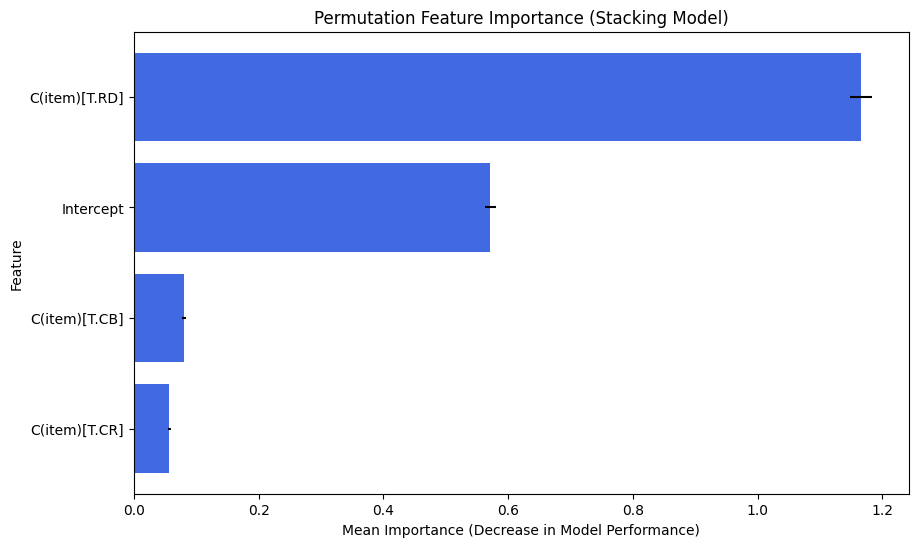


[price(원/kg) 예측 요인]
         Feature  Importance       Std
3  C(item)[T.RD]    1.165179  0.018024
0      Intercept    0.571181  0.008599
1  C(item)[T.CB]    0.080461  0.003492
2  C(item)[T.CR]    0.056499  0.002376


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# 전체 스태킹 모델 기준으로 중요도 계산
result = permutation_importance(stack_model, X_test_scaled, y_test,
                                n_repeats=10, random_state=42, n_jobs=-1)

# 길이에 맞춰 자동 처리
n_features = len(result.importances_mean)
features = X.columns[:n_features] if len(X.columns) >= n_features else [f"Feature_{i}" for i in range(n_features)]

# 결과 정리
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': result.importances_mean,
    'Std': result.importances_std
}).sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10],
         xerr=feature_importance['Std'][:10], color='royalblue')
plt.gca().invert_yaxis()
plt.title("Permutation Feature Importance (Stacking Model)")
plt.xlabel("Mean Importance (Decrease in Model Performance)")
plt.ylabel("Feature")
plt.show()

# 상위 10개 출력
print("\n[price(원/kg) 예측 요인]")
print(feature_importance.head(10))


모델 예측에 가장 큰 영향을 미친 변수는 C(item)[T.RD]로, 해당 품목이 가격 변동을 결정하는 핵심 요인으로 작용했습니다. 그다음으로는 Intercept(상수항), C(item)[T.CB], C(item)[T.CR] 순으로 중요도가 높게 나타났습니다.

이는 모델이 ‘품목 구분(item)’ 정보를 중심으로 가격(원/kg)을 예측하고 있음을 보여주며, 다른 변수보다 품목 특성에 따른 가격 차이가 시장 가격 형성에 직접적인 영향을 준다는 점을 시사합니다.

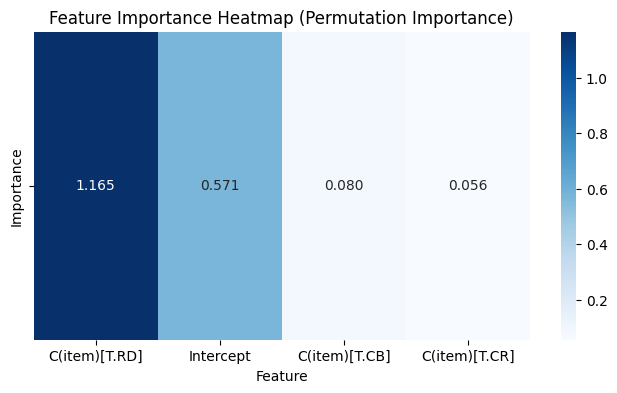

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(
    feature_importance.set_index('Feature')[['Importance']].T,
    cmap='Blues', annot=True, fmt=".3f"
)
plt.title("Feature Importance Heatmap (Permutation Importance)")
plt.ylabel("")
plt.show()
